In [12]:
import pandas as pd
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
s_scaler = StandardScaler()

X = s_scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
print('------------------- confussion matrix ----------------------------')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308

------------------- confussion matrix ----------------------------
[[119  40]
 [ 20 129]]


We have a 0.81 accuracy, which is not bad, but we can do better. Let's try PCA.

In [22]:
# n_components = min(n_samples, n_features)
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X_train)

"""""
We could also use IncrementalPCA, this is used when the dataset is too large to fit in memory
It uses batches to train the model

    ipca = IncrementalPCA(n_components=n_components, batch_size=10)
    ipca.fit(X_train)

"""""

'""\nWe could also use IncrementalPCA, this is used when the dataset is too large to fit in memory\nIt uses batches to train the model\n\n    ipca = IncrementalPCA(n_components=n_components, batch_size=10)\n    ipca.fit(X_train)\n\n'

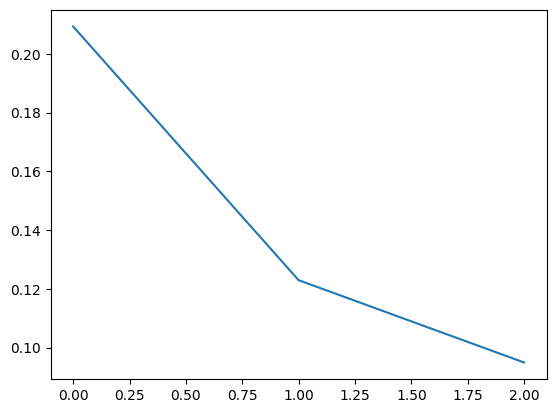

In [21]:
# Let's see the variance explained by each component
plt.plot(range(n_components), pca.explained_variance_ratio_)
plt.show()

From the graph we can conclude that the first component explains most of the variance, the second is less important and the third is almost irrelevant.

In [25]:
"""""
    The solver parameter in LogisticRegression specifies the algorithm to use for optimization. 
    The value 'lbfgs' stands for Limited-memory Broyden-Fletcher-Goldfarb-Shanno, which is an optimization algorithm 
    that approximates the Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm using limited memory. 
    It is particularly suited for problems with a large number of parameters.
"""""
lr_pca = LogisticRegression(solver='lbfgs')

# transform the training data with PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca.fit(X_train_pca, y_train)

print('------------------- PCA ----------------------------')
print(classification_report(y_test, lr_pca.predict(X_test_pca)))

------------------- PCA ----------------------------
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       159
           1       0.75      0.83      0.79       149

    accuracy                           0.79       308
   macro avg       0.79      0.79      0.79       308
weighted avg       0.79      0.79      0.79       308



We have 0.79 accuracy, which is a little bit worse than the previous model. But we have reduced the number of features from 13 to 3. Thus the computational cost is lower.

# Kernels
A Kernel is a mathematical function that takes non-linear input space and transforms it into a higher-dimensional space. This is useful in some algorithms like SVM, where the data is not linearly separable.

In [29]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=4, kernel='rbf')
kpca.fit(X_train)

KernelPCA(kernel='rbf', n_components=4)

In [30]:
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

lr_kpca = LogisticRegression(solver='lbfgs')
lr_kpca.fit(X_train_kpca, y_train)

print('------------------- KPCA ----------------------------')
print(classification_report(y_test, lr_kpca.predict(X_test_kpca)))

------------------- KPCA ----------------------------
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       159
           1       0.79      0.85      0.82       149

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



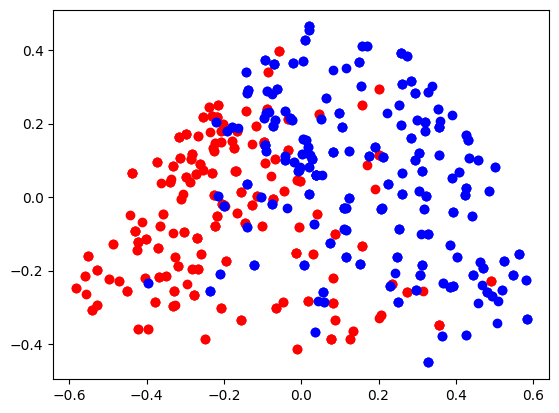

In [31]:
# plot the polynomial kernel
plt.scatter(X_train_kpca[y_train == 0, 0], X_train_kpca[y_train == 0, 1], color='red')
plt.scatter(X_train_kpca[y_train == 1, 0], X_train_kpca[y_train == 1, 1], color='blue')
plt.show()